In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
#
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
# from sklearn.metrics import accuracy_score, precision_recall_curve, plot_roc_curve, plot_confusion_matrix
# from sklearn.metrics import SCORERS, plot_precision_recall_curve
from sklearn.metrics import *
from sklearn.utils import parallel_backend
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer

from matplotlib import pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Constants
SEED = 87654

In [2]:
model = joblib.load('../models/fitted-nnet-activation-logistic.joblib')
# model

In [3]:
new_data = pd.read_csv('../data/new-data-to-predict.csv', na_values=['NA', 'NaN', 'Inf', '-Inf'])

####
# Obvs don't use these
id_vars = ['system_key', 'yrq']
target = 'Y'
####

# new_data = recode_cats(new_data, cat_var_list)
new_x_vars = [x for x in new_data.columns if x not in [target]]
new_x_vars = [x for x in new_x_vars if x not in id_vars]
new_x = new_data[new_x_vars]
# missing_vars = [x for x in x_vars if x not in new_x_vars]
# missing_vars = dict((x, np.nan) for x in missing_vars)

new_preds = model.predict(new_x)
new_predsa = model.predict_proba(new_x)

In [5]:
new_predsa[0:10,]

array([[0.50790047, 0.49209953],
       [0.50642023, 0.49357977],
       [0.84792396, 0.15207604],
       [0.9007377 , 0.0992623 ],
       [0.76854401, 0.23145599],
       [0.97897596, 0.02102404],
       [0.99245438, 0.00754562],
       [0.97192752, 0.02807248],
       [0.78902078, 0.21097922],
       [0.64043257, 0.35956743]])

(array([1120., 1246.,  992.,  729.,  538.,  366.,  295.,  222.,  247.,
         660.]),
 array([4.47558389e-04, 1.00389752e-01, 2.00331945e-01, 3.00274138e-01,
        4.00216332e-01, 5.00158525e-01, 6.00100718e-01, 7.00042912e-01,
        7.99985105e-01, 8.99927298e-01, 9.99869492e-01]),
 <a list of 10 Patch objects>)

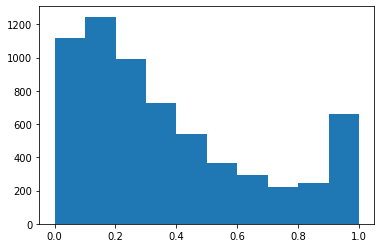

In [4]:
# prob of `1``
plt.hist(new_predsa[:,1])

In [7]:
# new_data[id_vars]
df = new_data[id_vars]
df = df.assign(pred0 = new_predsa[:,0],
               pred1 = new_predsa[:,1])

df.head()

,system_key,yrq,pred0,pred1
0,697655,20202,0.507900,0.492100
1,740342,20202,0.506420,0.493580
2,777087,20202,0.847924,0.152076
3,787502,20202,0.900738,0.099262
4,842028,20202,0.768544,0.231456


In [9]:
outpath = '../data-preds/'
fname = 'pred-proba-' + str(df['yrq'][0]) + '.csv'
print(outpath + fname)
df.to_csv(outpath + fname, index = False)

../data-preds/pred-proba-20202.csv
